<a href="https://www.kaggle.com/code/nigamshitij/object-detection-model-using-camera-vids?scriptVersionId=176966213" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-tests/dunno.jpeg
/kaggle/input/personal-tests/model.pkl
/kaggle/input/personal-tests/munchkin.jpeg
/kaggle/input/personal-tests/aku.jpeg


In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct = 0.2,
    seed = 42,
    label_func = is_cat,
    item_tfms = Resize(224)
)

In [4]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 168MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.162483,0.026853,0.009472,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.050930,0.027061,0.007442,00:32


In [5]:
# import ipywidgets as widgets
# uploader = widgets.FileUpload()
# uploader

In [6]:
img_path = '/kaggle/input/personal-tests/aku.jpeg'
uploader = SimpleNamespace(data = [img_path])
img = PILImage.create(uploader.data[0])
is_cat, _, probs = learn.predict(img)
print(f"is this a cat?: {is_cat}.")
print(f"probability: {probs[1].item():.6f}")

is this a cat?: False.
probability: 0.000000


In [7]:
path = untar_data(URLs.CAMVID_TINY)

# def labeler(o):
#     return path/'labels'/f'{o.stem}_P{o.suffix}'
    
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs = 8,
    fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
#     label_func = labeler,
    codes = np.loadtxt(path/'codes.txt', dtype = str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.569801,2.536841,00:01


epoch,train_loss,valid_loss,time
0,1.878717,1.512838,00:01
1,1.604575,1.333385,00:01
2,1.422308,0.955472,00:01
3,1.293781,0.919556,00:01
4,1.165583,0.800098,00:01
5,1.050359,0.736090,00:01
6,0.955292,0.707373,00:01
7,0.881178,0.698153,00:01


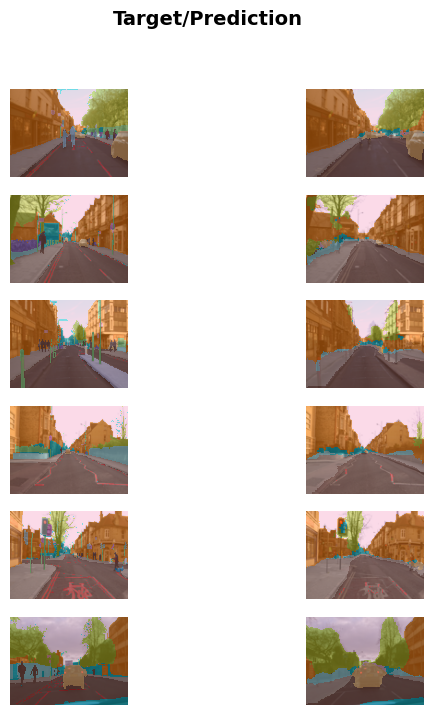

In [8]:
learn.show_results(max_n = 6, figsize = (7,8))

In [9]:
# # sentiment recognition experiments -- moved to separate notebook 

# from fastai.text.all import *
# # import shutil
# # shutil.rmtree('/.fastai/data/imdb_tok')

# path = untar_data(URLs.IMDB)
# path.ls()

# dls = TextDataLoaders.from_folder(
#     path,
#     valid = 'test',
# #     bs = 32
# )

# learn = text_classifier_learner(
#     dls,
#     AWD_LSTM,
#     drop_mult = 0.5,
#     metrics = accuracy
# )

# learn.fine_tune(4, 1e-2)

In [10]:
# learn.predict("I really liked it")

In [ ]:
# memory clearing commands
# path.ls()
# ls /root/.fastai/data
# rm -r /root/.fastai/data/imdb_tok
# ls /root/.fastai/data